<a href="https://colab.research.google.com/github/yeshwanth098/AIML/blob/main/AIML_ASSIGNMENT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
d=df.describe(percentiles=[.25,.5])
d

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Count')

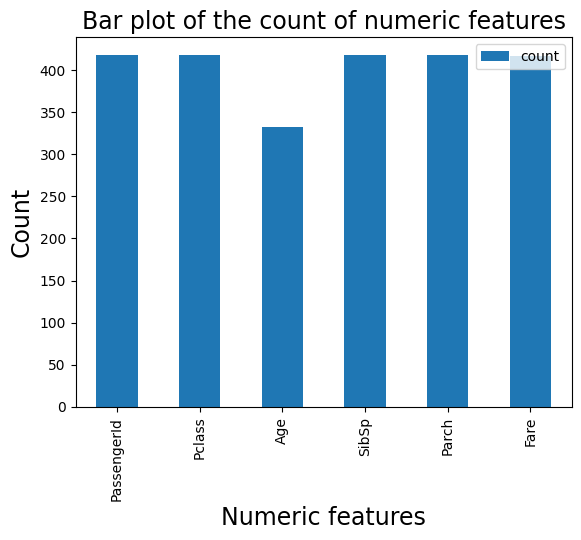

In [ ]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",
          fontsize=17)
plt.xlabel("Numeric features",fontsize=17)
plt.ylabel("Count",fontsize=17)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<Axes: xlabel='Embarked', ylabel='count'>

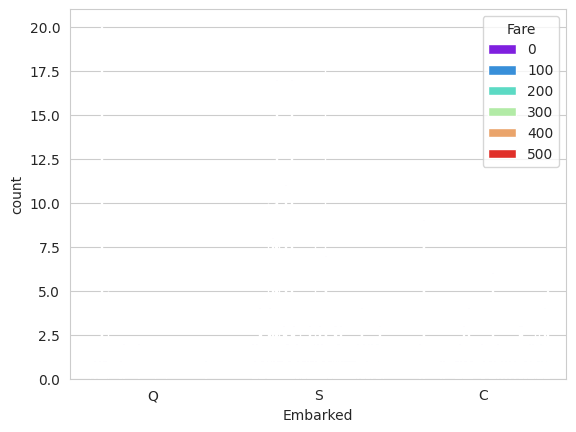

In [ ]:
print(df.columns)
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Fare',data=df,palette='rainbow')

<Axes: xlabel='Embarked', ylabel='count'>

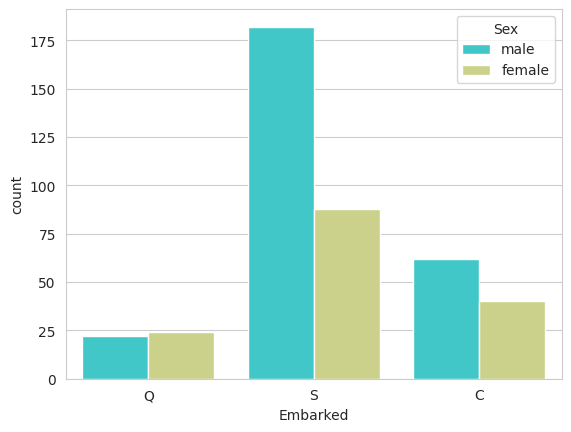

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Sex',data=df,palette='rainbow')

<Axes: xlabel='Embarked', ylabel='count'>

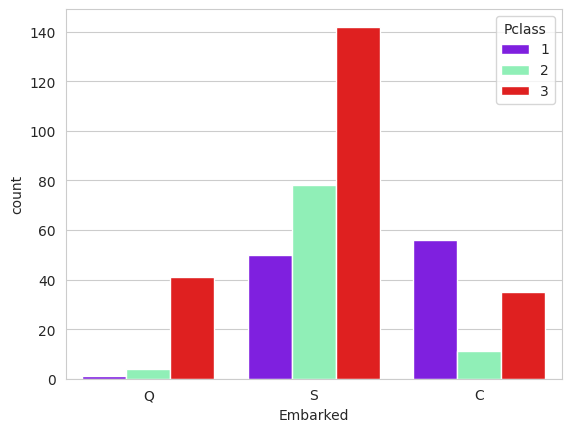

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Pclass',data=df,palette='rainbow')

In [ ]:
f_class_survived = df.groupby('Pclass')['Embarked'].agg(pd.Series.mode)
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived

,Embarked
Pclass,
1,C
2,S
3,S


<Axes: xlabel='Embarked', ylabel='count'>

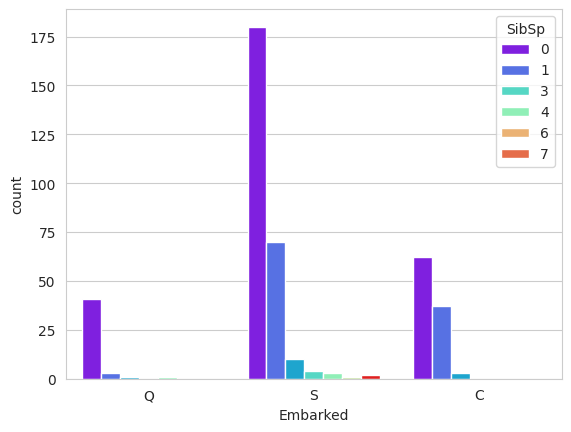

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='SibSp',data=df,palette='rainbow')

Text(0.5, 1.0, 'Agewise histogram of the passengers')

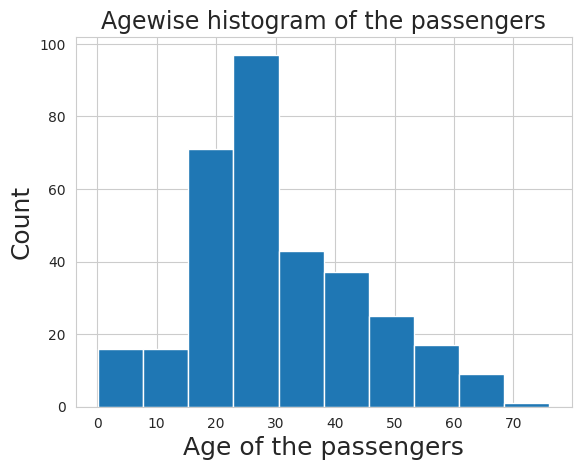

In [ ]:
df['Age'].hist()
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Agewise histogram of the passengers",fontsize=17)

<ipython-input-30-a2ac4e2b1e22>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Passenger Class', ylabel='Age'>

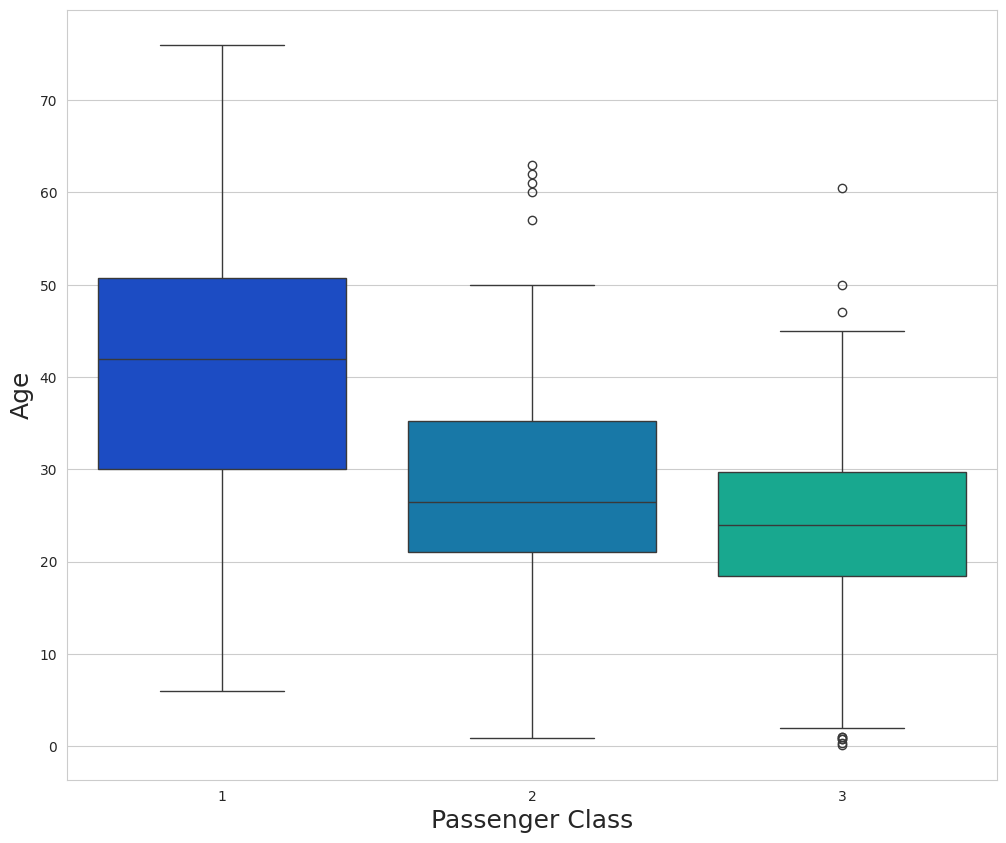

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

Text(0.5, 0, 'Passenger class')

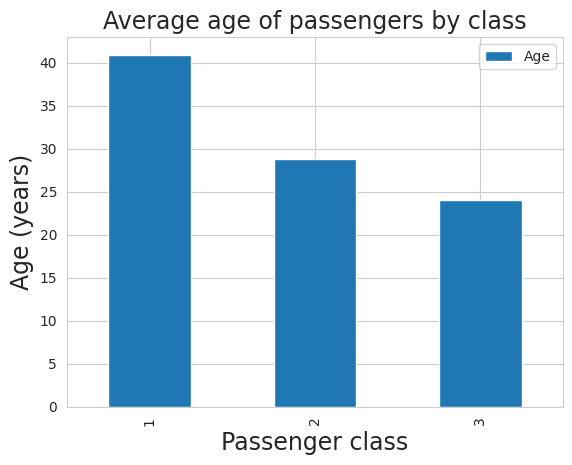

In [ ]:
f_class_Age=df.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)

f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

<ipython-input-33-1f12316fa4e4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-33-1f12316fa4e4>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Text(0.5, 1.0, 'Bar plot of numeric features')

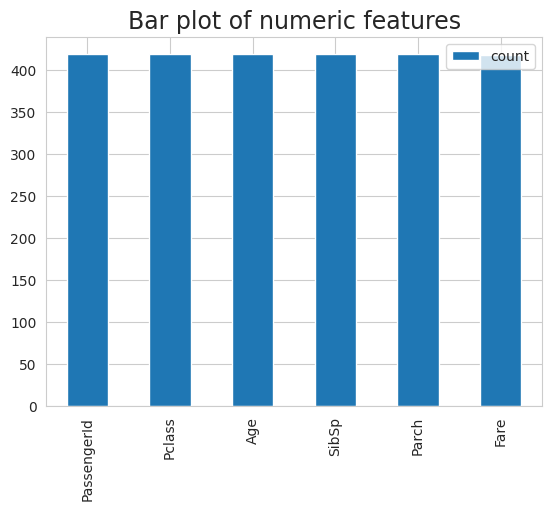

In [ ]:
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return a[0]
        elif Pclass == 2:
            return a[1]
        else:
            return a[2]
    else:
        return Age
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
d=df.describe()

dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of numeric features",fontsize=17)

In [ ]:
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,8.0500,S


In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.dropna(inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,24.027945,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,24.027945,0,0,8.0500,S


In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.500000,0,0,7.8292,True,True,False
1,3,47.000000,1,0,7.0000,False,False,True
2,2,62.000000,0,0,9.6875,True,True,False
3,3,27.000000,0,0,8.6625,True,False,True
4,3,22.000000,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,24.027945,0,0,8.0500,True,False,True
414,1,39.000000,0,0,108.9000,False,False,False
415,3,38.500000,0,0,7.2500,True,False,True
416,3,24.027945,0,0,8.0500,True,False,True


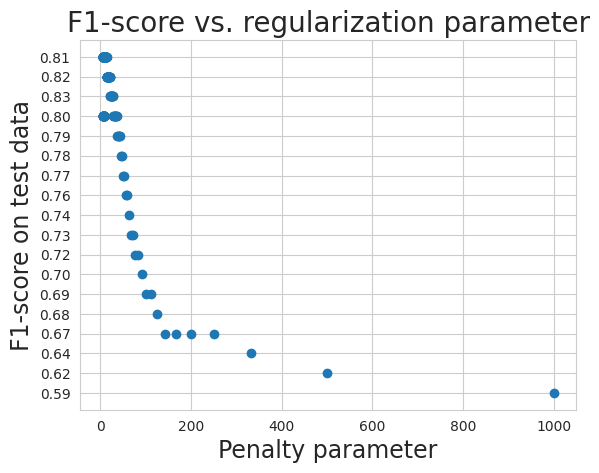

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4,
                                         max_iter=int(1e6),
                                         n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,
                                                predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()